# EDA using python 

### I am using titanic dataset in this project to do some exploratory data anlaysis. 
### So let's begin...

# Import liabraries
So first we import important libraries that are used in EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Now we load the data in our notebook.

In [2]:
titanic_data = pd.read_csv("C:\\Users\\Shashank\\Documents\\train.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin exploratory data analysis in our data

## Check for missing values

In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we see there are more null values in age and cabin column

#### We can also see it by using visualization using seaborn library

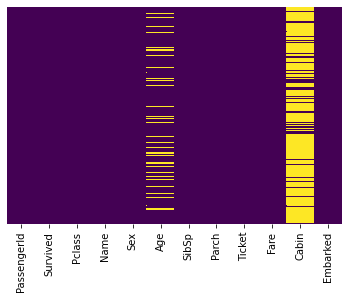

In [5]:
sns.heatmap(titanic_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In this heatmap we can see that age and cabin columns have more null values.

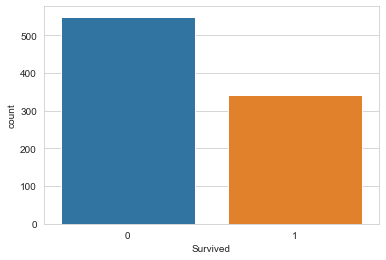

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = titanic_data)

By this graph we can see that how many peoples survived and not survived. 0 represent that people not survived and 1 represent that people survived.

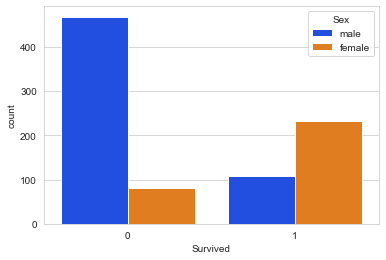

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_data, palette = 'bright')

As we can observe by graph there are many male who had not survived in this titanic accident but number of females who survived was more than males

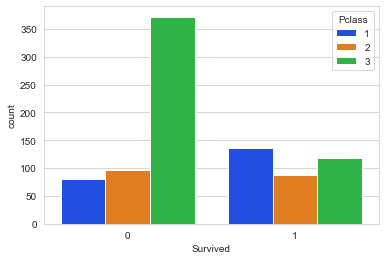

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_data, palette = 'bright')

As we see by graph there are many people from passenger class 3 were not able to survive, but number of survived peoples from passenger class 3 is greater than passenger class 2.

Now we see the age distribution so that we can find that what age peoples are there in boat

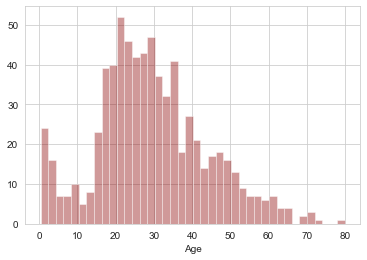

In [9]:
sns.distplot(titanic_data['Age'].dropna(), kde = False, color = 'darkred', bins = 40)

As we can see that there are many young peoples between 20-40 age in the boat.

#### we can also do this by matplotlib

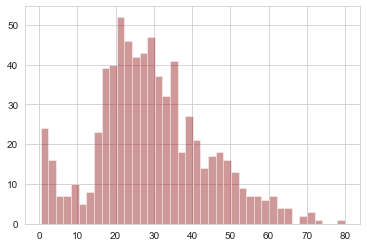

In [10]:
titanic_data['Age'].hist(bins = 40, color = 'darkred', alpha = 0.4)

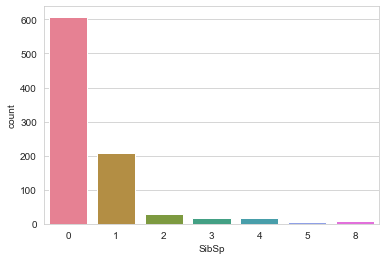

In [11]:
sns.countplot(x = 'SibSp', data = titanic_data, palette = 'husl')

By this graph we can see that many peoples in the boat don't have siblings and spouse.(0 represents the people don't have any siblings and spouse and so on...)

Now we see fare distribution..

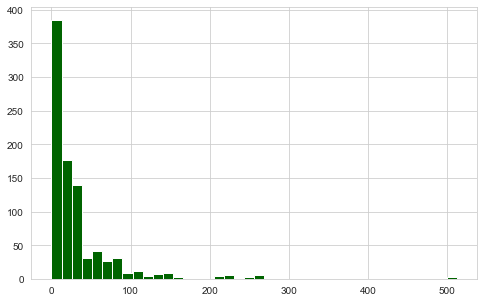

In [12]:
titanic_data['Fare'].hist(bins = 40, color = 'darkgreen', figsize = (8,5))

# Data Cleaning

As we see in beginning age and cabin column have so many null values so we have to clean the dataset.

First we see some visualization for better understanding of the age column because age column has less null values.

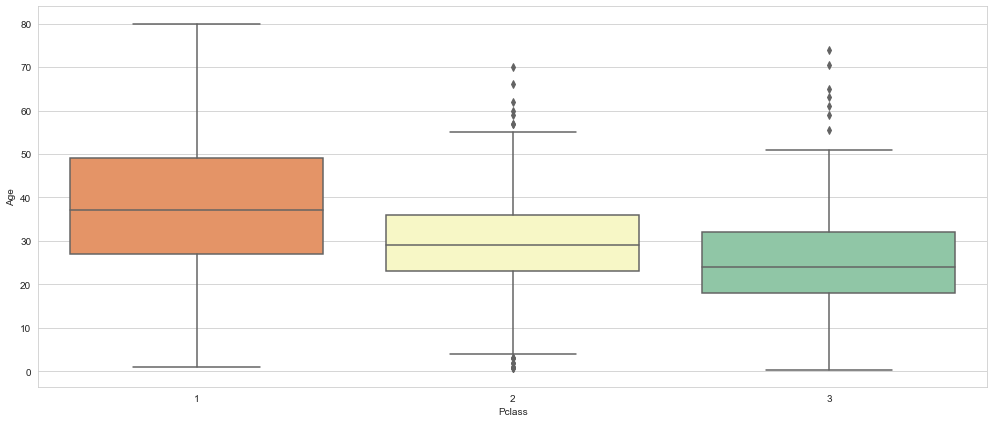

In [13]:
plt.figure(figsize = (17,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_data, palette = 'Spectral')

We plot the passenger class plot with respect to age so we can see that the average age of passengers. By seeing these box-plots we can see that average values of passenger age travelling in class 1 is around 37, average age of passenger travelling in class 2 is around 29 and average age of passenger travelling in 3 class is around 24. 

So based on these conclusions we can replace the null values of age by average values.

In [14]:
def change_age_value(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [15]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(change_age_value, axis = 1)

### Now check the heatmap again

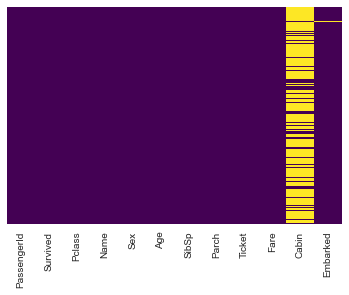

In [16]:
sns.heatmap(titanic_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Good! age null values gone!! now we see there are many null values in cabin column so we have to drop this column.

In [17]:
titanic_data.drop('Cabin', axis = 1, inplace = True)

In [18]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


It's good now cabin column was removed

In [19]:
titanic_data.dropna(inplace = True)

Now we see unique values in  columns.

In [20]:
titanic_data.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [21]:
titanic_data.shape

(889, 11)

In [22]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Now we calculate the average age of all the passengers.

In [23]:
np.average(titanic_data['Age'])

29.019313835770525

Now we calculate the average age of male and female

In [24]:
titanic_data.groupby(['Sex']).agg(average_age = ('Age' , 'mean'))

,average_age
Sex,
female,27.516026
male,29.832184


Now we calculate what is the average fare pay by all passengers

In [25]:
np.average(titanic_data['Fare'])

32.09668087739032

Now we calculate average fare for male and female

In [26]:
titanic_data.groupby('Sex').agg(average_fare = ('Fare' , 'mean'))

,average_fare
Sex,
female,44.252124
male,25.523893


Now we also calculate average fare price for all passenger class type

In [27]:
titanic_data.groupby('Pclass').agg(average_fare = ('Fare', 'mean'))

,average_fare
Pclass,
1,84.193516
2,20.662183
3,13.675550


# The End thanks for being here...I think you learn alot from this project